#Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data

## By -Ritika

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the training dataset
train_df = pd.read_csv('/content/train.csv')

# Load the gender_submission dataset
gender_submission_df = pd.read_csv('/content/gender_submission.csv')


In [ ]:
# Fill missing values in the 'Age' column with the median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Fill missing values in the 'Embarked' column with the most frequent value
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column as it has too many missing values
train_df.drop('Cabin', axis=1, inplace=True)

# Convert 'Sex' column to numerical values (0 for male and 1 for female)
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})


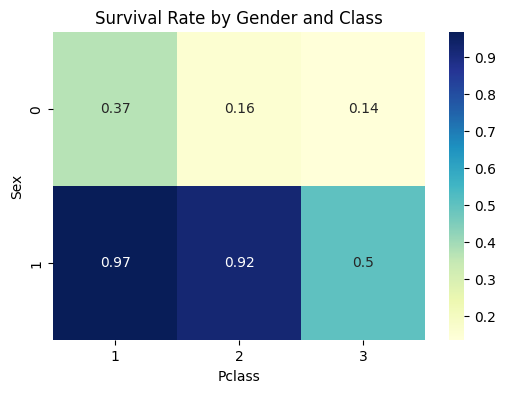

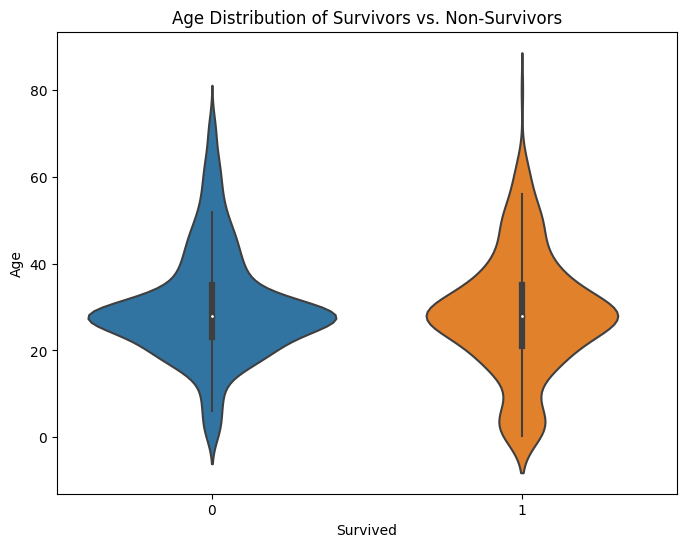

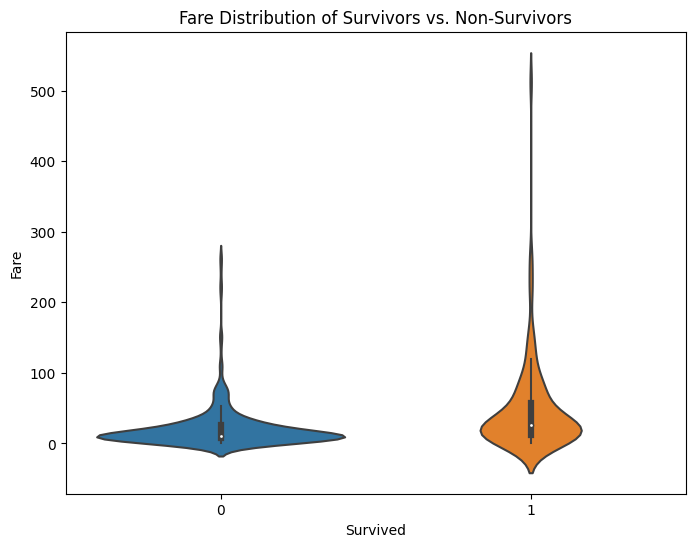

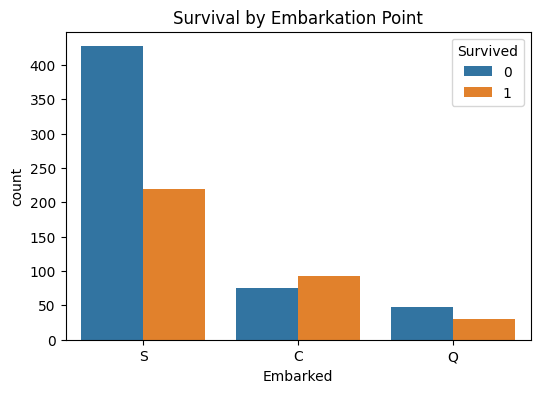

In [ ]:
# Explore the relationship between survival, gender, and class using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(train_df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack(), annot=True, cmap='YlGnBu')
plt.title('Survival Rate by Gender and Class')
plt.show()

# Explore the relationship between age and survival using a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Survived', y='Age', data=train_df)
plt.title('Age Distribution of Survivors vs. Non-Survivors')
plt.show()

# Explore the relationship between fare and survival using a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Survived', y='Fare', data=train_df)
plt.title('Fare Distribution of Survivors vs. Non-Survivors')
plt.show()

# Explore the relationship between embarkation point and survival
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=train_df)
plt.title('Survival by Embarkation Point')
plt.show()

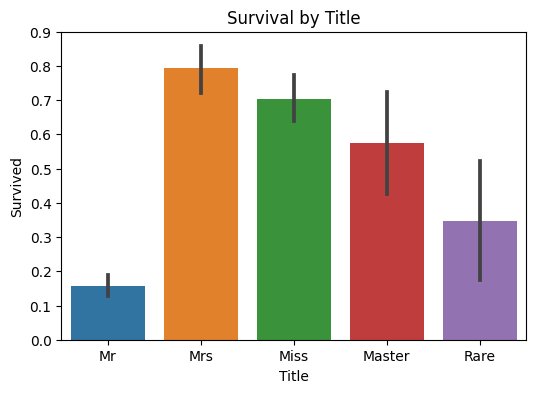

In [ ]:
# Extract the title from the 'Name' column and create a new feature 'Title'
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Combine less frequent titles into a single category 'Rare'
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

# Replace common female titles with 'Mrs'
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

# Explore the relationship between title and survival
plt.figure(figsize=(6, 4))
sns.barplot(x='Title', y='Survived', data=train_df)
plt.title('Survival by Title')
plt.show()


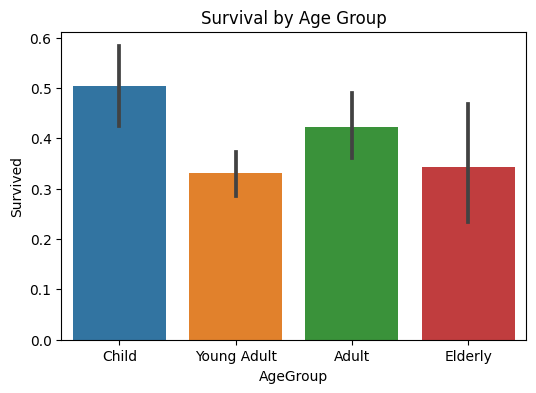

In [ ]:
# Create age categories (bins) to analyze age groups
bins = [0, 18, 30, 50, 80]
labels = ['Child', 'Young Adult', 'Adult', 'Elderly']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels)

# Explore the relationship between age group and survival
plt.figure(figsize=(6, 4))
sns.barplot(x='AgeGroup', y='Survived', data=train_df)
plt.title('Survival by Age Group')
plt.show()


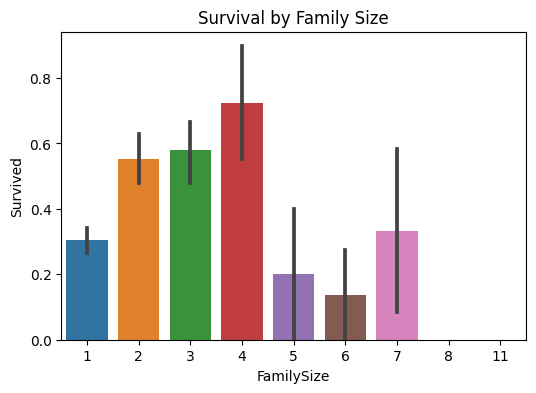

In [ ]:
# Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# Explore the relationship between family size and survival
plt.figure(figsize=(6, 4))
sns.barplot(x='FamilySize', y='Survived', data=train_df)
plt.title('Survival by Family Size')
plt.show()


In [ ]:
# Fill missing values in the 'Age' column with the median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Fill missing values in the 'Embarked' column with the most frequent value
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Fill missing values in the 'Fare' column with the median fare
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

# Convert 'Sex' column to numerical values (0 for male and 1 for female)
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

# Drop unnecessary columns for analysis
X_train = train_df.drop(['Survived', 'Name', 'Ticket', 'Embarked', 'Title', 'AgeGroup'], axis=1)


